**Importamos las librerías necesarias:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Cargamos nuestra base de datos. Se transforma la variable 'Fecha' a datetime para evitar problemas de visualización:**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/cpizarrov/proyecto_final/main/covid_global.csv")
df['Fecha'] = pd.to_datetime(df['Fecha'])

**Antes de proceder con la creación de nuevas variables, nos gustaría saber si hay algo más que decir acerca de la evolución de los casos acumulados:**

<AxesSubplot:xlabel='Fecha', ylabel='Confirmados acumulados'>

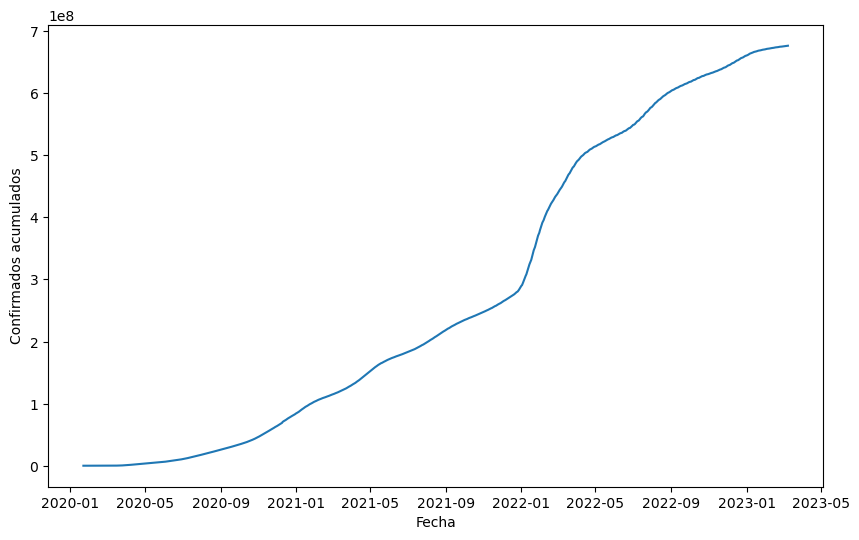

In [4]:
casos_globales = df.groupby('Fecha')[['Confirmados acumulados', 'Muertes acumuladas', 'Recuperados acumulados']].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=casos_globales, x='Fecha', y='Confirmados acumulados', linestyle='-')

<AxesSubplot:xlabel='Fecha', ylabel='Muertes acumuladas'>

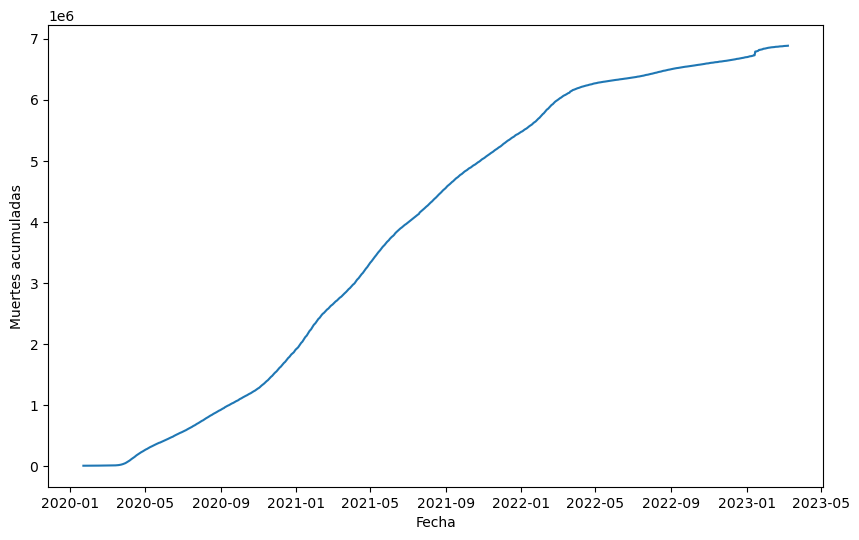

In [5]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=casos_globales, x='Fecha', y='Muertes acumuladas', linestyle='-')

<AxesSubplot:xlabel='Fecha', ylabel='Recuperados acumulados'>

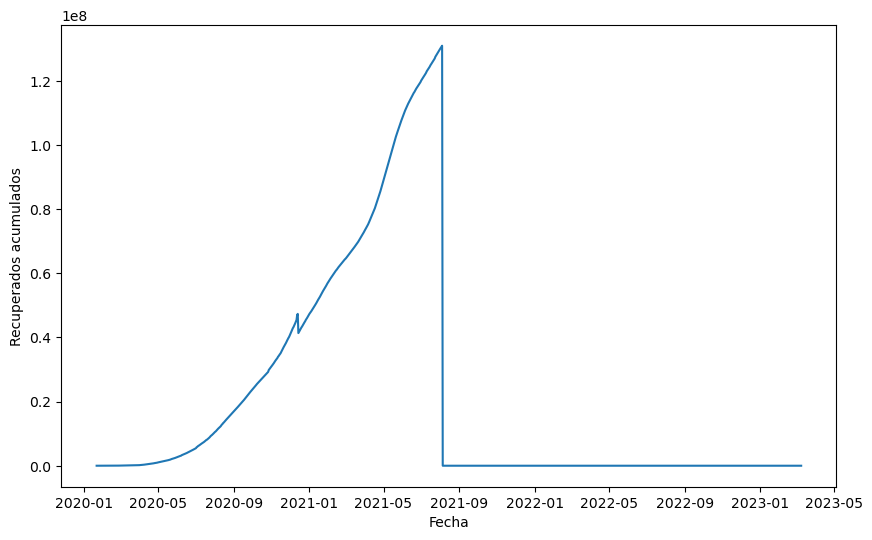

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=casos_globales, x='Fecha', y='Recuperados acumulados', linestyle='-')

**En general llama la atención que el año 2022 hayan aumentado abruptamente los casos confirmados. Lo ideal es estudiar esto a más detalle con los casos a nivel diario, por lo cual ahora es el momento ideal para comenzar a añadir nuevas variables:**

- La anomalía en los casos recuperados es algo que tenemos mapeado con anterioridad, pero no lo corregiremos aún. 

**Se añade la variable 'confirmados diarios' y observamos algunas métricas:**

In [7]:
df = df.sort_values(by=['País', 'Fecha'], ascending=[True, True])
df

,País,Fecha,Confirmados acumulados,Muertes acumuladas,Recuperados acumulados
0,Afghanistan,2020-01-22,0,0,0
197,Afghanistan,2020-01-23,0,0,0
394,Afghanistan,2020-01-24,0,0,0
591,Afghanistan,2020-01-25,0,0,0
788,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
224382,Zimbabwe,2023-03-05,264127,5668,0
224579,Zimbabwe,2023-03-06,264127,5668,0
224776,Zimbabwe,2023-03-07,264127,5668,0
224973,Zimbabwe,2023-03-08,264276,5671,0


In [8]:
df['Confirmados diarios'] = df.groupby('País')['Confirmados acumulados'].diff()
df['Confirmados diarios'].describe()

count    2.249740e+05
mean     3.007314e+03
std      1.805989e+04
min     -3.488400e+05
25%      0.000000e+00
50%      2.700000e+01
75%      5.840000e+02
max      1.354505e+06
Name: Confirmados diarios, dtype: float64

**Observamos anomalías, pues no debiesen existir valores negativos (el mínimo indica que la variación diaria de confirmados decreció en algunos registros, lo que no debería ser posible). Procedemos a investigar esta situación:**

In [9]:
df[df['Confirmados diarios'] < 0]

,País,Fecha,Confirmados acumulados,Muertes acumuladas,Recuperados acumulados,Confirmados diarios
11426,Afghanistan,2020-03-20,24,0,1,-2.0
140264,Afghanistan,2022-01-03,158183,7364,0,-6.0
218473,Afghanistan,2023-02-04,208621,7894,0,-48.0
32117,Antigua and Barbuda,2020-07-03,68,3,23,-1.0
93187,Antigua and Barbuda,2021-05-09,1231,32,1168,-1.0
...,...,...,...,...,...,...
16145,Uruguay,2020-04-12,480,7,231,-21.0
179854,Vanuatu,2022-07-22,11723,14,0,-7.0
181233,Vanuatu,2022-07-29,11724,14,0,-6.0
39988,Yemen,2020-08-11,1831,523,919,-1.0


In [10]:
df[(df['Fecha'] > "2023-02-02") & (df['País'] == 'Afghanistan')]

,País,Fecha,Confirmados acumulados,Muertes acumuladas,Recuperados acumulados,Confirmados diarios
218276,Afghanistan,2023-02-03,208669,7891,0,0.0
218473,Afghanistan,2023-02-04,208621,7894,0,-48.0
218670,Afghanistan,2023-02-05,208627,7896,0,6.0
218867,Afghanistan,2023-02-06,208704,7896,0,77.0
219064,Afghanistan,2023-02-07,208721,7896,0,17.0
219261,Afghanistan,2023-02-08,208771,7896,0,50.0
219458,Afghanistan,2023-02-09,208771,7896,0,0.0
219655,Afghanistan,2023-02-10,208943,7896,0,172.0
219852,Afghanistan,2023-02-11,208971,7896,0,28.0
220049,Afghanistan,2023-02-12,208982,7896,0,11.0


In [11]:
df[(df['Fecha'] > "2020-04-10") & (df['País'] == 'Uruguay')]

,País,Fecha,Confirmados acumulados,Muertes acumuladas,Recuperados acumulados,Confirmados diarios
15948,Uruguay,2020-04-11,501,7,224,7.0
16145,Uruguay,2020-04-12,480,7,231,-21.0
16342,Uruguay,2020-04-13,483,8,248,3.0
16539,Uruguay,2020-04-14,492,8,260,9.0
16736,Uruguay,2020-04-15,493,9,272,1.0
...,...,...,...,...,...,...
224374,Uruguay,2023-03-05,1034303,7617,0,0.0
224571,Uruguay,2023-03-06,1034303,7617,0,0.0
224768,Uruguay,2023-03-07,1034303,7617,0,0.0
224965,Uruguay,2023-03-08,1034303,7617,0,0.0


**Para estos casos, simplemente reemplazaremos los valores negativos resultantes en 'Confirmados diarios' con 0, dado que no tenemos forma de saber si se debe a una cuestión metodológica (correcciones en conteos) o errores de otro tipo.**